<h1 style="text-align: center;"><center>Information Retrieval in High Dimensional Data</center></h1>
<h2 style="text-align: center;"><center>Assignment 1</center></h2>
<center> 

##### by

### Safa Sadiq - 03751043
### Ali Ahmad Khan - 03751040


##Task 1

**Part (i)**

$$ S^T\Sigma\Sigma S = S^T\begin{bmatrix}
\sigma_{11} &  &  & \\
 & . &  & \\
 &  & . & \\
 &  &  & \sigma_{pp}\\
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} &  &  & \\
 & . &  & \\
 &  & . & \\
 &  &  & \sigma_{pp}\\
\end{bmatrix}S$$

$$=S^T\begin{bmatrix}
\sigma_{11}^{2} &  &  & \\
 & . &  & \\
 &  & . & \\
 &  &  & \sigma_{pp}^{2}\\
\end{bmatrix}S $$

$$=S^T\Sigma^2S $$
$$=[s_1  . . . s_p]\Sigma^2\begin{bmatrix}
s_1\\
.\\
.\\
s_p
\end{bmatrix}$$

$$=[s_1\sigma_{11}^{2}. . . s_p\sigma_{pp}^2]\begin{bmatrix}s_1\\.\\.\\s_p
\end{bmatrix}$$

$$=\sum_{i=1}^{p}s_i^2\sigma_{ii}^2$$

Hence$\;S^T\Sigma\Sigma^TS =\sum_{i=1}^{p}s_i^2\sigma_{ii}^2 \le \sum_{i=1}^{p}s_i^2\sigma_{11}^2\hspace{2cm}as\hspace{1cm}\sigma_{11} \ge \sigma_{22} ...\ge\sigma_{pp}$<br><br>
So $\;S^T\Sigma\Sigma^TS =\sum_{i=1}^{p}s_i^2\sigma_{11}^2 \le \sigma_{11}^2\sum_{i=1}^{p}s_i^2 = \sigma_{11}^2\hspace{1cm}given\hspace{.4cm}||S|| = \sum_{i=1}^ps_i=1 $
<br><br>
Hence the upper bound on $\;\;\hat{s} = argmax_{s\;s.t\;||s||=1}S^T\Sigma\Sigma^TS\;\;$ is given by $\;\;\;\sigma_{11}^2$ 
<br>
as $\;S^T\Sigma\Sigma^TS \le \sigma_{11}^2$ under the constraint that $||s||=1$
<br><br>
Therefore, a normalized vector:  $\;\;\hat{s}=[1\;0\,.\,.\,.\;0]^T \in R^p$
<br><br><br>
**Part (ii)**

$$\frac{1}{N}\sum_{i=1}^N(a^Tx_i)^2 = \frac{1}{N}a^Txx^Ta$$
$$= \frac{1}{N}(a^TU\Sigma V^TV\Sigma^TU^Ta)$$
$$= \frac{1}{N}(a^TU\Sigma\Sigma^TU^Ta)$$
$$\;\;\;\;as\;V^TV=1\;becasue\;V\;is\;orthogonal$$
<br>
$$= \frac{1}{N}(s^T\Sigma\Sigma^Ts)$$
$$s.t\;\;s=U^Ta$$

As we have denoted $s=U^Ta$, so $a = Us$, under the constraint $||s||=1$
<br>
This keeps the constraint $||a||=1$ as $||a||^2=||Us||^2=s^TU^TUs=s^Ts=1$
<br><br>
Using $a = Us$, $\frac{1}{N}a^TU\Sigma\Sigma^TU^Ta = \frac{1}{N}s^TU^TU\Sigma\Sigma^TU^TUs$
<br><br>
$\hspace{6cm}\;\;\,\,=\frac{1}{N}s^T\Sigma\Sigma^Ts$
<br><br>
From part i, we know that the vector that can maximize $s^T\Sigma\Sigma s$ is $\hat{s}=[1\;0\,.\,.\,.\;0] = U^Ta$
<br><br>
As $a = Us,$
<br><br>
$$\begin{bmatrix}
u_{11} & u_{12}&  .& .&.\\
u_{21}& . & & \\
 .&  & . & &\\
 .&  & & .&\\
 .&  & & &.\\
 &  &  & & &u_{pp}^{2}\\\end{bmatrix}\begin{bmatrix}1\\0\\.\\.\\.\\0\end{bmatrix}=\begin{bmatrix}
u_{11}\\
u_{21}\\
.\\
.\\
.\\
u_{p1}
\end{bmatrix}=u_1\hspace{1cm}(first\;column\;of\;U)$$
<br><br>
Hence $\frac{1}{N}\sum_{i=1}^N(a^Tx_i)^2$ is maximized when $a = u_1$

##Task 2 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import glob
from skimage import io
from scipy.spatial import distance
from statistics import mode

#!unzip /content/task2_data.zip

part 1

In [ ]:
#function to read images and return a matrix with images and a list with labels

def read_images(filepath):
  T = [] #empty list for images 
  T_labels = [] #empty list for labels

  for filename in glob.glob(filepath + '/*.png'):  #loop over all images in subset 
      im=Image.open(filename)  #load image
      im=np.asarray(im).flatten()  #convert image to 1d array
      T.append(im)  #add image to list
      T_labels.append(filename[34:36])  #add label to list


  #save images as columns of matrix T
  T = np.array(T)  
  T = T.transpose()

  return T, T_labels

In [ ]:
#function to return first k singular vectors of matrix T
def find_singular_vectors(T, k):
  
  #center data
  mean = np.mean(T,axis=1)
  T_centered = T - np.expand_dims(mean,axis=1)

  #compute SVD
  U, sigma, V = np.linalg.svd(T_centered)

  return U[:,0:k]



In [ ]:
#read subset0
T, T_labels = read_images("/content/yaleBfaces/subset0")

#use function to find singular vectors
U = find_singular_vectors(T, 20)


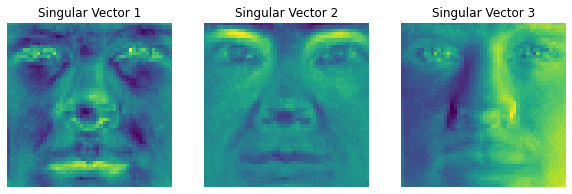

In [ ]:
#plot first 3 singular vectors
fig = plt.figure(figsize=(10, 10))

for i in range(0, 3):
    img = U[:,i]  #SV i
    img = img.reshape(50,50) #reshape image

    fig.add_subplot(1,3,i+1) #add image to plot
    plt.imshow(img)
    plt.title('Singular Vector '+ str(i+1))
    plt.axis('off')


plt.show()


part 2

In [ ]:
#find nearest neighbour label
def Knn3(T, T_labels, S):

  S_predicted_labels = [] #list to store predcited labels

  for i in range(0, S.shape[1]): #loop over all test images
    dist = []

    for j in range(0, T.shape[1]): #for each test image, loop over all train images 
      dist.append(distance.euclidean(S[:,i], T[:,j])) #find euclidean distance

    top3 = res = sorted(range(len(dist)), key = lambda sub: dist[sub])[:3] #find indices of 3 shortest distances
    predictions = [T_labels[x] for x in top3] #copy labels for indices for 3 shortest distances
    S_predicted_labels.append(mode(predictions)) #find most common label from the top 3 labels

  return S_predicted_labels

In [ ]:
def classify_images(T, T_labels, S, S_labels, U, k):
  U = U[:, 0:k] #keep k principal components
  U = U.transpose()
  #apply dimensionality reduction
  T = np.dot(U, T)
  S = np.dot(U, S)

  #use the knn classifier to predict the results
  S_predicted_labels = Knn3(T, T_labels, S)

  #compute error rate 
  incorrect_predictions = 0
  for i in range(0, len(S_labels)):
    if S_labels[i] != S_predicted_labels[i]:
      incorrect_predictions +=1

  return incorrect_predictions / len(S_labels)

In [ ]:
def experiment(name_of_function):
  #read training data
  T, T_labels = read_images("/content/yaleBfaces/subset0")
  U = find_singular_vectors(T, 20)

  k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
  subsets = ["Subset1", "Subset2", "Subset3", "Subset4"]
  error_rate = np.zeros((len(subsets), len(k)))


  #run experiment for each k and each subset
  for i in range(0, len(subsets)):
    S, S_labels = read_images("/content/yaleBfaces/subset"+str(i))

    for j in range(0, len(k)):
      error_rate[i][j] = name_of_function(T, T_labels, S, S_labels, U, k[j])
  
  #plot error rate against k for each subset
  plt.xlabel('k')
  plt.ylabel('Error rate')

  for i in range(0,len(subsets)):
      plt.plot(k,error_rate[i], label =subsets[i], marker='x' )

  plt.rcParams["figure.figsize"] = (7,7)
  plt.legend()
  plt.show()

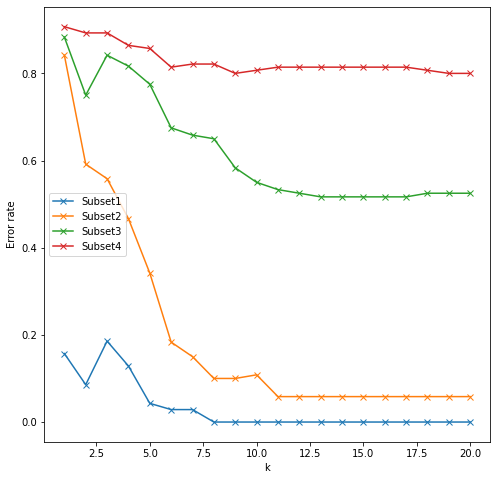

In [ ]:
experiment(classify_images)

part 3

In [ ]:
def classify_images_adjusted(T, T_labels, S, S_labels, U, k):
  U = U[:, 3:k+3] #keep k principal components from the 4th one onwards
  U = U.transpose()
  #apply dimensionality reduction
  T = np.dot(U, T)
  S = np.dot(U, S)

  #use the knn classifier to predict the results
  S_predicted_labels = Knn3(T, T_labels, S)

  #compute error rate 
  incorrect_predictions = 0
  for i in range(0, len(S_labels)):
    if S_labels[i] != S_predicted_labels[i]:
      incorrect_predictions +=1

  return incorrect_predictions / len(S_labels)

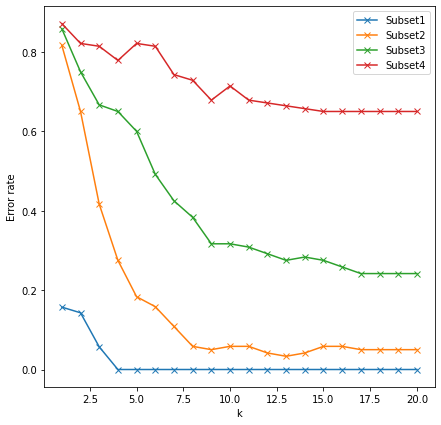

In [ ]:
experiment(classify_images_adjusted)

The general decrease in the error rate may be due to the fact that the first 3 principle components donot contain information which maybe helpful for distinguishing faces. 